# Imports

In [5]:
import urllib
import PIL.Image
import io
import os
import matplotlib.pyplot as plt
import time
import numpy as np
import torch
from multiprocessing import Process, Manager, Lock
from collections import Counter
from transformers import T5Tokenizer, T5EncoderModel
from datasets import load_dataset
from datasets.utils.file_utils import get_datasets_user_agent
from torchvision import datasets, transforms
from pprint import pprint

# Load dataset

In [6]:
dataset = load_dataset("conceptual_captions", trust_remote_code=True)

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_url', 'caption'],
        num_rows: 3318333
    })
    validation: Dataset({
        features: ['image_url', 'caption'],
        num_rows: 15840
    })
})

# Count most common word

In [4]:
save_dir = './dataset/'
file_name = 'dataset_conceptual_captions_flower'
file_name_word = 'list_of_conceptual_captions_most_common_word'
mode = "train"
number_of_most_commont_word = 100
save_count = 0

In [5]:
def most_commont_word(init_step, end_step, dataset, mode, counter_list, num_process):
    process_counter = Counter()
    for i in range(init_step, end_step):
        label = dataset[mode][i]['caption'].split(" ")
        counter = Counter(label)
        process_counter.update(counter)
    counter_list.append(process_counter)
    print("------ Process {} is finish. ------".format(num_process))

In [6]:
def most_commont_word_with_word(init_step, end_step, dataset, mode, counter_list, num_process, word):
    process_counter = Counter()
    for i in range(init_step, end_step):
        label = dataset[mode][i]['caption']
        if word in label:
            label = label.split(" ")
            counter = Counter(label)
            process_counter.update(counter)
    counter_list.append(process_counter)
    print("------ Process {} is finish. ------".format(num_process))

In [6]:
if __name__ == "__main__":
    with Manager() as manager:
        available_cpu_core = os.cpu_count()
        counter_list = manager.list()
        num_rows = dataset[mode].num_rows
        step = num_rows // available_cpu_core
        range_ = list(range(0, num_rows, step))
        list_of_process = list()
        for i in range(len(range_)-1):
            process = Process(target=most_commont_word, args=(range_[i],range_[i+1],dataset, mode, counter_list, i+1))
            process.start()
            list_of_process.append(process)
        for p in list_of_process:
            p.join()
        word_counter = Counter()
        print("------ Start join counter. ------")
        for c in counter_list:
            word_counter.update(c)
        list_of_most_common_word = [word[0] for word in word_counter.most_common(number_of_most_commont_word) if len(word[0])>3]
        np.save(f'{save_dir}{file_name_word}.npy', list_of_most_common_word)
        print("------ Most common word is save.------")
        np.save(f'{save_dir}{"conceptual_captions_most_common_word_counter"}.npy', word_counter)
        print("------ Word_counter is save. ------")
        pprint(word_counter.most_common(300))

------ Process 1 is finish. ------
------ Process 2 is finish. ------
------ Process 4 is finish. ------
------ Process 3 is finish. ------
------ Process 7 is finish. ------
------ Process 6 is finish. ------
------ Process 5 is finish. ------
------ Process 8 is finish. ------
------ Start join counter. ------
------ Most common word is save.------
------ Word_counter is save. ------
[('the', 2168674),
 ('a', 1800782),
 ('.', 1161670),
 ('of', 1049386),
 ('in', 844973),
 ('on', 741508),
 ('and', 638288),
 (',', 534974),
 ('with', 516324),
 ('to', 376011),
 ('person', 344010),
 ('at', 331605),
 ('for', 310017),
 ('during', 231991),
 ('-', 214191),
 ('is', 203625),
 ('background', 171438),
 ('from', 162656),
 ('an', 159405),
 ('white', 152511),
 ('this', 145153),
 ('by', 141997),
 (':', 141304),
 ('actor', 128828),
 ('artist', 125916),
 ('as', 110631),
 ('player', 101200),
 ("'s", 100205),
 ('up', 98608),
 ('view', 98229),
 ('his', 98041),
 ('illustration', 92181),
 ('man', 86975),
 ('

In [121]:
if __name__ == "__main__":
    with Manager() as manager:
        available_cpu_core = os.cpu_count()
        counter_list = manager.list()
        num_rows = dataset[mode].num_rows
        step = num_rows // available_cpu_core
        range_ = list(range(0, num_rows, step))
        list_of_process = list()
        for i in range(len(range_)-1):
            process = Process(target=most_commont_word_with_word, args=(range_[i],range_[i+1],dataset, mode, counter_list, i+1, "flowers"))
            process.start()
            list_of_process.append(process)
        for p in list_of_process:
            p.join()
        word_counter = Counter()
        print("------ Start join counter. ------")
        for c in counter_list:
            word_counter.update(c)
        list_of_most_common_word = [word[0] for word in word_counter.most_common(number_of_most_commont_word) if len(word[0])>3]
        np.save(f'{save_dir}{file_name_word}.npy', list_of_most_common_word)
        print("------ Most common word is save.------")
        np.save(f'{save_dir}{"conceptual_captions_most_common_word_counter"}.npy', word_counter)
        print("------ Word_counter is save. ------")
        pprint(word_counter.most_common(300))

------ Process 1 is finish. ------
------ Process 2 is finish. ------
------ Process 3 is finish. ------
------ Process 4 is finish. ------------ Process 5 is finish. ------

------ Process 6 is finish. ------
------ Process 7 is finish. ------
------ Process 8 is finish. ------
------ Start join counter. ------
------ Most common word is save.------
------ Word_counter is save. ------
[('flowers', 32879),
 ('a', 21560),
 ('the', 18266),
 ('of', 15840),
 ('in', 12950),
 ('.', 11895),
 ('with', 11191),
 ('and', 11078),
 ('on', 9734),
 (',', 7096),
 ('background', 5383),
 ('white', 4473),
 ('to', 2889),
 ('for', 2619),
 ('-', 2553),
 ('pattern', 2164),
 ('garden', 2066),
 ('pink', 2052),
 ('yellow', 2016),
 ('bouquet', 1889),
 ('seamless', 1880),
 ('beautiful', 1864),
 ('field', 1756),
 ('blue', 1738),
 ('at', 1738),
 ('spring', 1663),
 ('red', 1526),
 ('person', 1454),
 ('sunflowers', 1428),
 ('vector', 1365),
 ('leaves', 1364),
 ('from', 1361),
 ('green', 1325),
 ('by', 1317),
 ('wild'

In [7]:
np.load(f'{save_dir}{file_name_word}.npy')

array(['with', 'person', 'during', 'background', 'from', 'white', 'this',
       'actor', 'artist', 'player', 'view', 'illustration', 'football',
       'premiere', 'team', 'city', 'woman', 'image', 'that', 'against',
       'young', 'vector', 'stage', 'over', 'game', 'black', 'after',
       'beach', 'tree', 'people', 'girl', 'their', 'playing', 'your',
       'attends', 'night', 'blue', 'film', 'water', 'photo', 'performs',
       'room', 'house', 'isolated', 'show', 'festival', 'beautiful',
       'home', 'into', 'through', 'fashion', 'match', 'looking',
       'musical', 'first', 'portrait', 'like', 'sitting', 'world',
       'sports'], dtype='<U12')

# Load image

In [12]:
USER_AGENT = get_datasets_user_agent()
def _fetch_single_image(image_url, timeout=None, retries=0):
    for _ in range(retries + 1):
        try:
            request = urllib.request.Request(
                image_url,
                data=None,
                headers={"user-agent": USER_AGENT},
            )
            with urllib.request.urlopen(request, timeout=timeout) as req:
                image = PIL.Image.open(io.BytesIO(req.read()))
            break
        except Exception:
            image = None
    return image

In [13]:
def show_samples(img,size,caption):
  """ Plots some samples from the dataset """
  plt.figure(figsize=(16,16))
  plt.title(f'size:{size}, caption:{caption}')
  plt.imshow(img)

In [14]:
def show_samples2(img,text):
  """ Plots some samples from the dataset """
  plt.title(text)
  plt.imshow(img)

In [15]:
def show_samples3(img):
  """ Plots some samples from the dataset """
  plt.figure(figsize=(3,3))
  plt.imshow(img)

# preprocess image

## crop image function

In [8]:
def crop_image(img):
  h,w = img.size
  min_size = min(h,w)
  crop = transforms.CenterCrop(size=min_size)
  img = crop(img)
  return img

## function

In [22]:
def preprocess_image(data, crop_threshold, resize_size, mode, init_step, end_step, max_allow_size, max_data):
    #most_common_word = np.load(f'{save_dir}{file_name_word}.npy')
    #most_common_word = ['flowers']
    most_common_word = ['background']
    for i in range(init_step, end_step):
        label = dataset[mode][i]['caption']
        if any(word in label for word in most_common_word):
            img = _fetch_single_image(dataset[mode][i]['image_url'], timeout=1)
            if img is not None:
                h,w = img.size
                max_size = max(h,w)
                min_size = min(h,w)
                threshold = max_size/min_size
                if threshold <= crop_threshold and resize_size <= min_size and max_allow_size >= max_size:
                    if h != w:
                        crop_image(img)
                    img = img.resize(size=(resize_size,resize_size))
                    img = img.convert('RGB')
                    data[len(data)]={'img':img,'label':label}
                    if max_data <= len(data):
                        break
                    if len(data) % 1000 == 0:
                        print('------ Se han guardado ya {} imagenes ------'.format(len(data)))

In [23]:
save_dir = 'dataset/'
file_name = 'conceptual_captions_128'
max_data = 50000

if __name__ == "__main__":
    crop_threshold = 1.1
    resize_size = 128
    max_allow_size = 2048
    mode = "train"
    with Manager() as manager:
        cache = manager.dict()
        cache['name'] = file_name
        cache['dataset'] = dict()
        cache['shape'] = (3,resize_size,resize_size)
        data = manager.dict()
        #count = manager.Value(int,0)
        available_cpu_core = os.cpu_count()
        num_rows = dataset[mode].num_rows
        print(num_rows)
        step = num_rows // available_cpu_core
        range_ = list(range(0, num_rows, step))
        list_of_process = list()
        for i in range(len(range_)-1):
            #process = Process(target=preprocess_image, args=(cache, count, crop_threshold, resize_size, mode, range_[i], range_[i+1], max_allow_size))
            process = Process(target=preprocess_image, args=(data, crop_threshold, resize_size, mode, range_[i], range_[i+1], max_allow_size, max_data))
            process.start()
            list_of_process.append(process)
        for p in list_of_process:
            p.join()
        cache = dict(cache)
        cache['dataset'] = dict(data)
        cache['length'] = len(cache['dataset'])
        np.save(f'{save_dir}{file_name}.npy', cache)

3318333
------ Se han guardado ya 1000 imagenes ------
------ Se han guardado ya 2000 imagenes ------
------ Se han guardado ya 3000 imagenes ------
------ Se han guardado ya 4000 imagenes ------
------ Se han guardado ya 5000 imagenes ------
------ Se han guardado ya 6000 imagenes ------
------ Se han guardado ya 7000 imagenes ------
------ Se han guardado ya 8000 imagenes ------
------ Se han guardado ya 9000 imagenes ------
------ Se han guardado ya 10000 imagenes ------
------ Se han guardado ya 11000 imagenes ------
------ Se han guardado ya 12000 imagenes ------
------ Se han guardado ya 13000 imagenes ------
------ Se han guardado ya 14000 imagenes ------
------ Se han guardado ya 15000 imagenes ------
------ Se han guardado ya 16000 imagenes ------
------ Se han guardado ya 17000 imagenes ------
------ Se han guardado ya 18000 imagenes ------
------ Se han guardado ya 19000 imagenes ------
------ Se han guardado ya 20000 imagenes ------
------ Se han guardado ya 21000 imagenes 

## Launch function

In [5]:
aux = np.load(f'{save_dir}{file_name}.npy',allow_pickle=True)

In [8]:
aux.item()['length']

7948

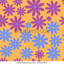

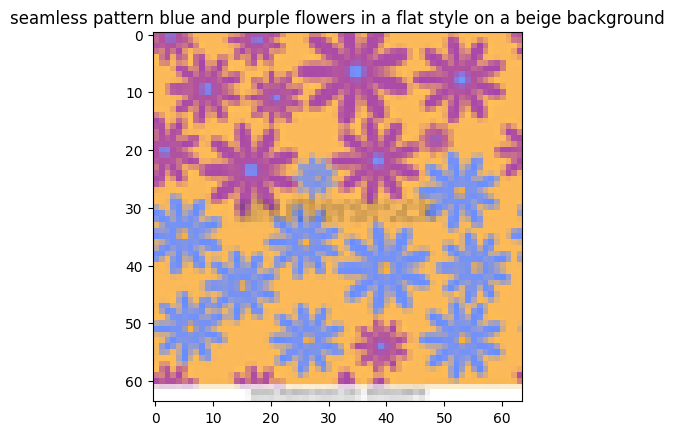

In [11]:
idx = 1
show_samples2(aux.item()['dataset'][idx]['img'],aux.item()['dataset'][idx]['label'])
aux.item()['dataset'][idx]['img']

In [3]:
from model.unet import Unet
from model.t5 import t5_encode_text
from model.training import *
from model.diffusionModel import DiffusionModel
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
from model.diffusionModel import DiffusionModel

# training hyperparameters
batch_size = 1750
n_epoch = 123
learning_rate = 1e-3
# network hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
n_feat = 128 # hidden dimension feature
max_text_len = 512 # word vector
height = 128 # 64x64 image
save_dir = './weights/'
# diffusion hyperparameters
timesteps = 500
MAX_TEXT_LEN = 64

df = DiffusionModel(timesteps, height)
dataset_data_path = './dataset/humanart_kids_drawing_128.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
print(len(dataset))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)
for imgs, label in dataloader:
    print(f'means: {imgs.mean()}, std: {imgs.std()}')
    img = df.unorm(imgs)
    print(f'means: {img.mean()}, std: {img.std()}')

2000
means: -0.008194096386432648, std: 1.0276583433151245
means: 0.6903442144393921, std: 0.28291434049606323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


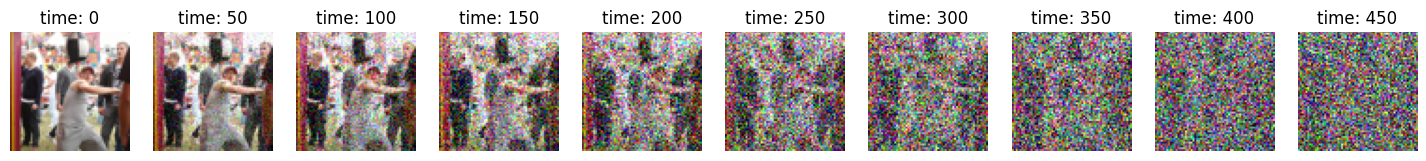

In [2]:
df.simulate_forward_diffusion(500, dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


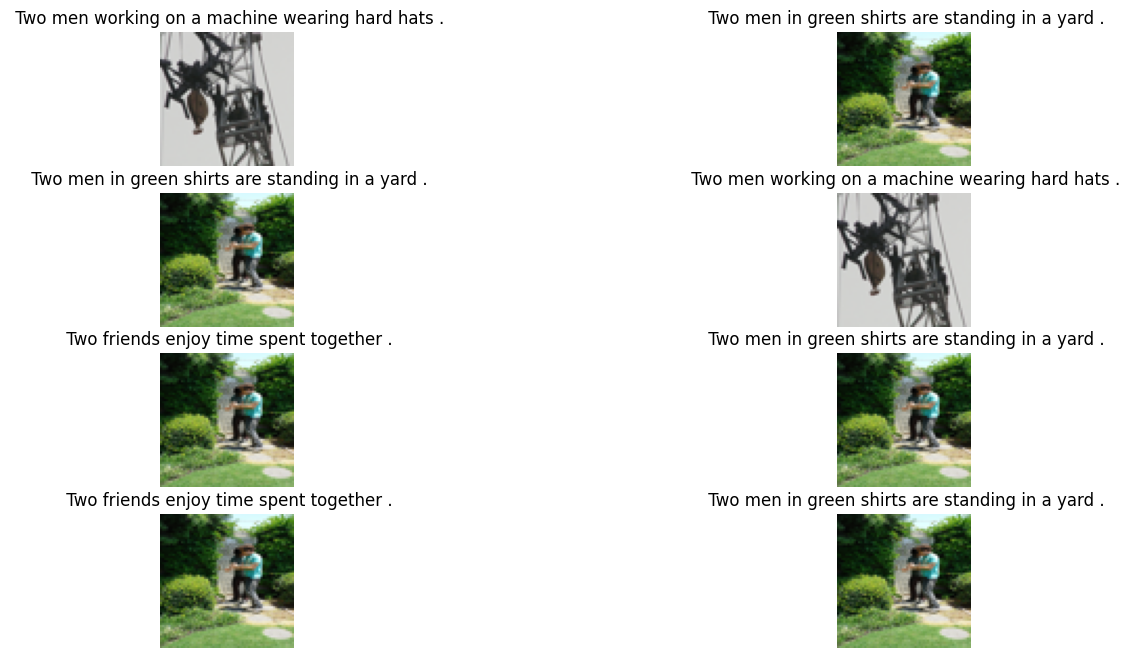

In [3]:
# display samples from a dataset randomly using Gaussian distribution
def show_samples(dataset, num_samples=40, cols=1):
  """ Plots some samples from the dataset """
  rows = int(num_samples / cols)
  if num_samples%cols!=0:
    rows += 1
  plt.figure(figsize=(16,rows*2))
  random_idx = torch.randint(0,len(dataset),(num_samples,))
  for i, idx in enumerate(random_idx):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    img, curr_label = dataset[int(idx%8)]
    img = df.unorm(img)
    plt.title(curr_label)
    plt.imshow(img.permute(1,2,0))
show_samples(dataset, num_samples=8,cols=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


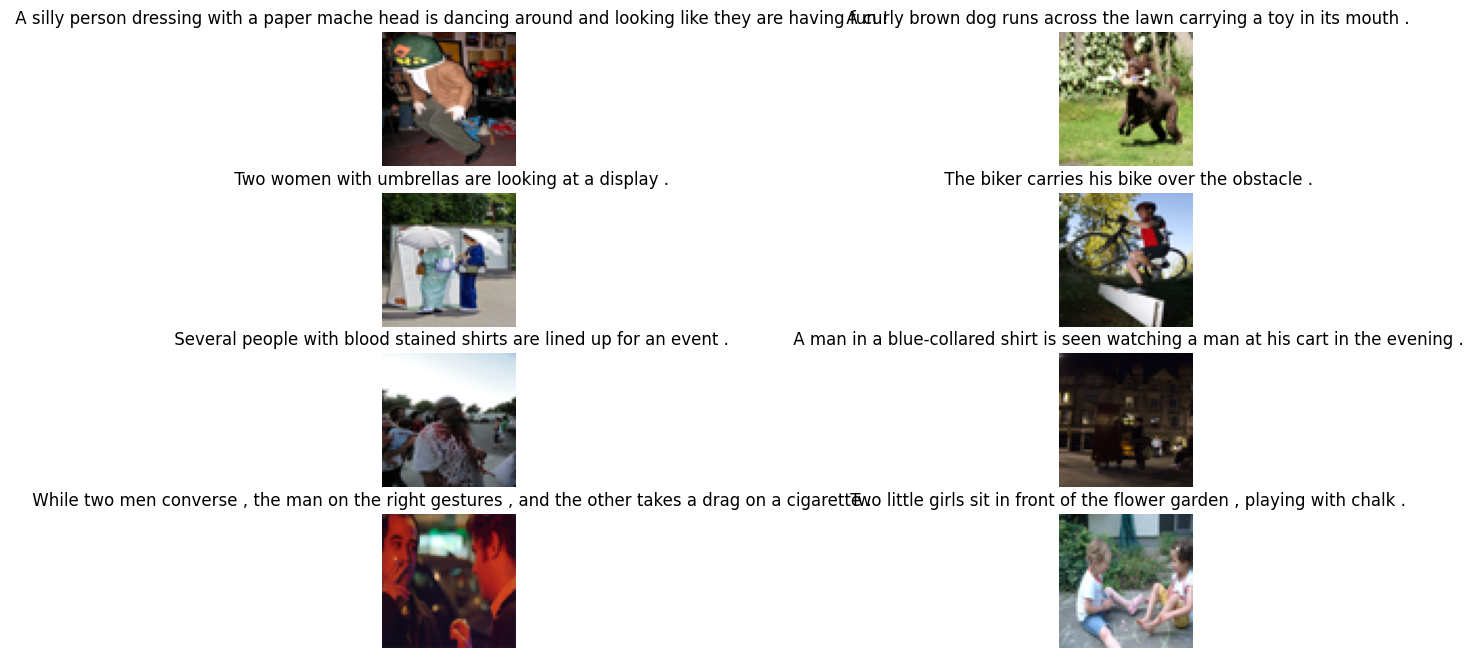

In [7]:
# display samples from a dataset randomly using Gaussian distribution
def show_samples(dataset, num_samples=40, cols=1):
  """ Plots some samples from the dataset """
  rows = int(num_samples / cols)
  if num_samples%cols!=0:
    rows += 1
  plt.figure(figsize=(16,rows*2))
  random_idx = torch.randint(0,len(dataset),(num_samples,))
  for i, idx in enumerate(random_idx):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    img, curr_label = dataset[int(idx)]
    img = df.unorm(img)
    plt.title(curr_label)
    plt.imshow(img.permute(1,2,0))
show_samples(dataset, num_samples=8,cols=2)

In [69]:
transformaaaa = transforms.Compose([
          transforms.Normalize(-0.12795954942703247,0.5259433388710022)
          ])
transformbbbbb = transforms.Compose([
          transforms.Normalize(0.5,0.5)
          ])
a = dataset[0][0]
b = transformaaaa(a)
c = transformbbbbb(a)

In [70]:
a, b, c

(tensor([[[-0.1922,  0.5294,  0.1451,  ..., -0.8824, -0.9137, -0.9373],
          [-0.1686,  0.3490,  0.0745,  ..., -0.8275, -0.9216, -0.8980],
          [-0.1922, -0.1451,  0.0902,  ..., -0.6627, -0.8353, -0.8118],
          ...,
          [ 0.7882,  0.7490,  0.6706,  ..., -0.3725, -0.4275,  0.2157],
          [ 0.2392,  0.5216,  0.6941,  ..., -0.3725, -0.4196,  0.3098],
          [ 0.4824,  0.4353,  0.1451,  ..., -0.3961, -0.4118,  0.3725]],
 
         [[-0.1216,  0.3882,  0.2235,  ..., -0.8118, -0.8510, -0.9137],
          [-0.0980,  0.2863,  0.1765,  ..., -0.7490, -0.8353, -0.8431],
          [-0.0902, -0.1059,  0.1843,  ..., -0.6784, -0.7176, -0.7176],
          ...,
          [ 0.5059,  0.4353,  0.3569,  ..., -0.0667, -0.1059,  0.3882],
          [-0.2078,  0.0824,  0.2941,  ..., -0.0824, -0.0980,  0.4667],
          [ 0.0118,  0.0275, -0.2627,  ..., -0.1137, -0.1059,  0.4980]],
 
         [[-0.1216,  0.0431, -0.0118,  ..., -0.9373, -0.9529, -0.9529],
          [-0.0902,  0.0353,

In [87]:
from model.training import *

dataset_data_path = './dataset/Flickr8k_dataset.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
dataset[0][0]

tensor([[[-0.1922,  0.5294,  0.1451,  ..., -0.8824, -0.9137, -0.9373],
         [-0.1686,  0.3490,  0.0745,  ..., -0.8275, -0.9216, -0.8980],
         [-0.1922, -0.1451,  0.0902,  ..., -0.6627, -0.8353, -0.8118],
         ...,
         [ 0.7882,  0.7490,  0.6706,  ..., -0.3725, -0.4275,  0.2157],
         [ 0.2392,  0.5216,  0.6941,  ..., -0.3725, -0.4196,  0.3098],
         [ 0.4824,  0.4353,  0.1451,  ..., -0.3961, -0.4118,  0.3725]],

        [[-0.1216,  0.3882,  0.2235,  ..., -0.8118, -0.8510, -0.9137],
         [-0.0980,  0.2863,  0.1765,  ..., -0.7490, -0.8353, -0.8431],
         [-0.0902, -0.1059,  0.1843,  ..., -0.6784, -0.7176, -0.7176],
         ...,
         [ 0.5059,  0.4353,  0.3569,  ..., -0.0667, -0.1059,  0.3882],
         [-0.2078,  0.0824,  0.2941,  ..., -0.0824, -0.0980,  0.4667],
         [ 0.0118,  0.0275, -0.2627,  ..., -0.1137, -0.1059,  0.4980]],

        [[-0.1216,  0.0431, -0.0118,  ..., -0.9373, -0.9529, -0.9529],
         [-0.0902,  0.0353, -0.0196,  ..., -0

In [86]:
from model.training import *

dataset_data_path = './dataset/Flickr8k_dataset.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
dataset[0][0]

tensor([[[-0.1922,  0.5294,  0.1451,  ..., -0.8824, -0.9137, -0.9373],
         [-0.1686,  0.3490,  0.0745,  ..., -0.8275, -0.9216, -0.8980],
         [-0.1922, -0.1451,  0.0902,  ..., -0.6627, -0.8353, -0.8118],
         ...,
         [ 0.7882,  0.7490,  0.6706,  ..., -0.3725, -0.4275,  0.2157],
         [ 0.2392,  0.5216,  0.6941,  ..., -0.3725, -0.4196,  0.3098],
         [ 0.4824,  0.4353,  0.1451,  ..., -0.3961, -0.4118,  0.3725]],

        [[-0.1216,  0.3882,  0.2235,  ..., -0.8118, -0.8510, -0.9137],
         [-0.0980,  0.2863,  0.1765,  ..., -0.7490, -0.8353, -0.8431],
         [-0.0902, -0.1059,  0.1843,  ..., -0.6784, -0.7176, -0.7176],
         ...,
         [ 0.5059,  0.4353,  0.3569,  ..., -0.0667, -0.1059,  0.3882],
         [-0.2078,  0.0824,  0.2941,  ..., -0.0824, -0.0980,  0.4667],
         [ 0.0118,  0.0275, -0.2627,  ..., -0.1137, -0.1059,  0.4980]],

        [[-0.1216,  0.0431, -0.0118,  ..., -0.9373, -0.9529, -0.9529],
         [-0.0902,  0.0353, -0.0196,  ..., -0

In [1]:
import numpy as np
from torchvision import transforms
file = np.load("./dataset/humanart_kids_drawing_128.npy", allow_pickle = True)
dataset = file.item()['dataset']
transform = transforms.Compose([
          transforms.ToTensor(),
          #transforms.Normalize(0.43602022528648376,0.2629716694355011)
          ])
dataset[1]['img'].mean(),dataset[:]['img'].std()

/home/jupyter-tfg2324dm/.conda/envs/envDM/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'Image' object has no attribute 'mean'

In [1]:
from model.training import *

dataset_data_path = './dataset/Flickr8k_dataset.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
dataset[0][0]

tensor([[[1.0113, 1.6973, 1.3319,  ..., 0.3551, 0.3253, 0.3029],
         [1.0337, 1.5258, 1.2648,  ..., 0.4073, 0.3179, 0.3402],
         [1.0113, 1.0560, 1.2797,  ..., 0.5639, 0.3999, 0.4222],
         ...,
         [1.9433, 1.9060, 1.8315,  ..., 0.8398, 0.7876, 1.3990],
         [1.4214, 1.6898, 1.8538,  ..., 0.8398, 0.7951, 1.4885],
         [1.6525, 1.6078, 1.3319,  ..., 0.8174, 0.8025, 1.5481]],

        [[1.0784, 1.5631, 1.4065,  ..., 0.4222, 0.3850, 0.3253],
         [1.1008, 1.4661, 1.3617,  ..., 0.4819, 0.3999, 0.3924],
         [1.1082, 1.0933, 1.3692,  ..., 0.5490, 0.5117, 0.5117],
         ...,
         [1.6749, 1.6078, 1.5332,  ..., 1.1306, 1.0933, 1.5631],
         [0.9964, 1.2723, 1.4736,  ..., 1.1157, 1.1008, 1.6376],
         [1.2052, 1.2201, 0.9442,  ..., 1.0859, 1.0933, 1.6674]],

        [[1.0784, 1.2350, 1.1828,  ..., 0.3029, 0.2880, 0.2880],
         [1.1082, 1.2275, 1.1753,  ..., 0.3029, 0.2955, 0.3029],
         [1.1157, 0.9740, 1.2052,  ..., 0.4297, 0.3701, 0.

In [ ]:
from model.unet import Unet
from model.t5 import t5_encode_text
from model.training import *
from model.diffusionModel import DiffusionModel
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np

# training hyperparameters
batch_size = 16
n_epoch = 100
learning_rate = 1e-3
# network hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
n_feat = 512 # hidden dimension feature
max_text_len = 128 # word vector max size
height = 64 # 64x64 image
save_dir = './weights/'
# diffusion hyperparameters
timesteps = 500

dataset_data_path = './dataset/Flickr30k_dataset.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)

df = DiffusionModel(timesteps, height)
model = Unet(in_channels=3, n_feat=n_feat, max_text_len=max_text_len, height=height, device=device).to(device)
print(model.parameters())
model.load_state_dict(torch.load(save_dir+"model_100.pth", map_location=device))
model.parameters()

In [2]:
torch.rand(size=(16,16))

tensor([[0.7608, 0.8080, 0.4643, 0.2859, 0.4910, 0.9382, 0.2058, 0.6212, 0.8630,
         0.4262, 0.3928, 0.4800, 0.8309, 0.1686, 0.6522, 0.5150],
        [0.5973, 0.0180, 0.2054, 0.2064, 0.9288, 0.0353, 0.8896, 0.2789, 0.0168,
         0.5381, 0.7320, 0.6855, 0.3262, 0.5546, 0.2284, 0.2686],
        [0.7147, 0.9367, 0.4282, 0.3153, 0.2836, 0.9457, 0.4051, 0.7359, 0.3720,
         0.6583, 0.4637, 0.0869, 0.5027, 0.3502, 0.6336, 0.9999],
        [0.8468, 0.7323, 0.9613, 0.4592, 0.5433, 0.8140, 0.8034, 0.0282, 0.1815,
         0.6142, 0.0609, 0.2760, 0.2028, 0.4713, 0.7972, 0.1213],
        [0.4819, 0.0248, 0.3646, 0.3878, 0.2937, 0.9880, 0.9865, 0.1829, 0.2017,
         0.3768, 0.5758, 0.5702, 0.7131, 0.2639, 0.0065, 0.3359],
        [0.8293, 0.1529, 0.4226, 0.3583, 0.3143, 0.6377, 0.1313, 0.3729, 0.9933,
         0.3129, 0.0108, 0.2687, 0.6489, 0.2253, 0.4618, 0.4493],
        [0.0298, 0.5351, 0.9273, 0.3590, 0.0803, 0.3558, 0.7618, 0.2255, 0.0539,
         0.9901, 0.8490, 0.6141, 0.04

In [3]:
import numpy as np
lista =[1,2,3]
lista = np.array(lista)
lista.mean(),lista.max(),lista.min(),lista.std()

(2.0, 3, 1, 0.816496580927726)

In [1]:
from model.t5 import t5_encode_text

print(t5_encode_text('sketch'))

/home/jupyter-tfg2324dm/.conda/envs/envDM/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


(tensor([[[-0.0284, -0.0489, -0.1322,  ..., -0.1610,  0.1060,  0.0662],
         [ 0.1523,  0.1092,  0.2834,  ...,  0.1671, -0.0424, -0.1213],
         [-0.0175,  0.0334, -0.0916,  ...,  0.0796,  0.0310,  0.1292]],

        [[ 0.0091,  0.0523, -0.0558,  ..., -0.1437, -0.0371, -0.0438],
         [ 0.1692,  0.1264,  0.0301,  ..., -0.0904, -0.2161, -0.1441],
         [ 0.0674,  0.0278, -0.1813,  ..., -0.0676, -0.0637,  0.1952]],

        [[ 0.0737, -0.0927, -0.0572,  ..., -0.1657,  0.0474,  0.1177],
         [ 0.1220,  0.1927,  0.3184,  ..., -0.0182, -0.0609, -0.1543],
         [ 0.0030,  0.0989, -0.1871,  ..., -0.0226,  0.0368,  0.1713]],

        [[-0.0021, -0.0058, -0.0729,  ..., -0.1402,  0.0375,  0.0637],
         [ 0.0788,  0.0400,  0.1564,  ...,  0.0417, -0.1887, -0.1952],
         [ 0.0318, -0.0115, -0.1914,  ..., -0.0140, -0.0407,  0.2735]],

        [[ 0.0449,  0.0714, -0.1518,  ..., -0.1152,  0.0245,  0.0102],
         [ 0.1949,  0.0742,  0.2192,  ..., -0.0051, -0.0857, -0.1907

In [2]:
from model.t5 import t5_encode_text

print(t5_encode_text('sketch,'))

(tensor([[[-0.0284, -0.0489, -0.1322,  ..., -0.1610,  0.1060,  0.0662],
         [ 0.1523,  0.1092,  0.2834,  ...,  0.1671, -0.0424, -0.1213],
         [-0.0175,  0.0334, -0.0916,  ...,  0.0796,  0.0310,  0.1292]],

        [[ 0.0091,  0.0523, -0.0558,  ..., -0.1437, -0.0371, -0.0438],
         [ 0.1692,  0.1264,  0.0301,  ..., -0.0904, -0.2161, -0.1441],
         [ 0.0674,  0.0278, -0.1813,  ..., -0.0676, -0.0637,  0.1952]],

        [[ 0.0737, -0.0927, -0.0572,  ..., -0.1657,  0.0474,  0.1177],
         [ 0.1220,  0.1927,  0.3184,  ..., -0.0182, -0.0609, -0.1543],
         [ 0.0030,  0.0989, -0.1871,  ..., -0.0226,  0.0368,  0.1713]],

        ...,

        [[ 0.0449,  0.0714, -0.1518,  ..., -0.1152,  0.0245,  0.0102],
         [ 0.1949,  0.0742,  0.2192,  ..., -0.0051, -0.0857, -0.1907],
         [-0.0236,  0.0614, -0.2020,  ..., -0.0273, -0.0282,  0.1391]],

        [[-0.0193,  0.0236, -0.0814,  ..., -0.0199, -0.0371, -0.0833],
         [ 0.2231,  0.0283,  0.0753,  ..., -0.0344, -0

In [3]:
from model.t5 import t5_encode_text

print(t5_encode_text('kids_drawing'))

(tensor([[[ 0.0091,  0.0523, -0.0558,  ..., -0.1437, -0.0371, -0.0438],
         [ 0.1692,  0.1264,  0.0301,  ..., -0.0904, -0.2161, -0.1441],
         [ 0.0674,  0.0278, -0.1813,  ..., -0.0676, -0.0637,  0.1952]],

        [[ 0.0222,  0.0618, -0.0242,  ...,  0.0441, -0.2192,  0.0039],
         [ 0.0194,  0.1100,  0.3561,  ..., -0.1309, -0.1727, -0.2516],
         [-0.0584,  0.1350, -0.1376,  ..., -0.0827,  0.0813,  0.1232]],

        [[ 0.0822, -0.0060, -0.0954,  ..., -0.1178, -0.0073,  0.0820],
         [ 0.1374,  0.2011,  0.2159,  ..., -0.1608, -0.0837, -0.1412],
         [ 0.0205,  0.0261, -0.1362,  ..., -0.1102,  0.0220,  0.2425]],

        ...,

        [[ 0.0222,  0.0618, -0.0242,  ...,  0.0441, -0.2192,  0.0039],
         [ 0.0194,  0.1100,  0.3561,  ..., -0.1309, -0.1727, -0.2516],
         [-0.0584,  0.1350, -0.1376,  ..., -0.0827,  0.0813,  0.1232]],

        [[-0.0289, -0.0352, -0.0830,  ..., -0.0994,  0.0114,  0.0515],
         [ 0.0878,  0.1222,  0.2787,  ..., -0.1322, -0

In [4]:
from model.t5 import t5_encode_text

print(t5_encode_text('kids'))

(tensor([[[ 0.0091,  0.0523, -0.0558,  ..., -0.1437, -0.0371, -0.0438],
         [ 0.1692,  0.1264,  0.0301,  ..., -0.0904, -0.2161, -0.1441],
         [ 0.0674,  0.0278, -0.1813,  ..., -0.0676, -0.0637,  0.1952]],

        [[ 0.0222,  0.0618, -0.0242,  ...,  0.0441, -0.2192,  0.0039],
         [ 0.0194,  0.1100,  0.3561,  ..., -0.1309, -0.1727, -0.2516],
         [-0.0584,  0.1350, -0.1376,  ..., -0.0827,  0.0813,  0.1232]],

        [[ 0.0822, -0.0060, -0.0954,  ..., -0.1178, -0.0073,  0.0820],
         [ 0.1374,  0.2011,  0.2159,  ..., -0.1608, -0.0837, -0.1412],
         [ 0.0205,  0.0261, -0.1362,  ..., -0.1102,  0.0220,  0.2425]],

        [[-0.0284, -0.0489, -0.1322,  ..., -0.1610,  0.1060,  0.0662],
         [ 0.1523,  0.1092,  0.2834,  ...,  0.1671, -0.0424, -0.1213],
         [-0.0175,  0.0334, -0.0916,  ...,  0.0796,  0.0310,  0.1292]]],
       device='cuda:0'), tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]], d